# Water Quality EDA

### Importing the necessary datasets

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Data reading and data Preprocessing

In [71]:
#reading the dataset

df=pd.read_csv("C:\\Users\HARIHARAN\Downloads\water quality\water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.Chloramines.value_counts()

Chloramines
7.300212     1
9.504361     1
6.217223     1
5.599870     1
10.786500    1
            ..
8.696479     1
5.846112     1
6.030640     1
6.378364     1
7.509306     1
Name: count, Length: 3276, dtype: int64

In [5]:
df.Chloramines.unique()

array([7.30021187, 6.63524588, 9.2758836 , ..., 7.35023323, 6.30335653,
       7.50930586])

In [6]:
df.ph.unique()

array([       nan, 3.71608008, 8.09912419, ..., 9.41951032, 5.12676292,
       7.87467136])

In [8]:
df.ph.value_counts()

ph
3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: count, Length: 2785, dtype: int64

### Filling the null values in ph columns by mean

In [73]:
#Filling the null values in ph columns by mean

df["ph"]=df["ph"].fillna(df["ph"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [74]:
#Filling the null values in sulphate and Trihalomethanes columns by mean

df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [75]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [77]:
#creating a dataset that contains info about potable water

df_potable=df[df["Potability"]==1]

#creating a dataset that contains info about non-potable water

df_not_potable=df[df["Potability"]==0]


In [21]:
df_potable.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,7.080795,169.974849,23403.637304,8.519730,333.775777,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1


In [78]:
#information regarding potable water
df_potable.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,7.074754,195.800744,22383.991018,7.169338,332.844122,425.383800,14.160893,66.533513,3.968328,1.0
std,1.343955,35.547041,9101.010208,1.702988,41.868471,82.048446,3.263907,15.971968,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.351824,174.330531,15668.985035,6.094134,313.052947,360.939023,12.033897,56.911186,3.430909,1.0
50%,7.080795,196.632907,21199.386614,7.215163,333.775777,420.712729,14.162809,66.396293,3.958576,1.0
75%,7.780068,218.003420,27973.236446,8.199261,354.807924,484.155911,16.356245,77.067457,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [7]:
#information regarding non potable water
df_not_potable.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.0
mean,7.084658,196.733292,21777.490788,7.092175,334.371700,426.730454,14.364335,66.308522,3.965800,0.0
std,1.545490,31.057540,8543.068788,1.501045,31.943667,80.047317,3.334554,15.642636,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.224046,177.823265,15663.057382,6.155640,319.354715,368.498530,12.101057,56.441831,3.444062,0.0
50%,7.080795,197.123423,20809.618280,7.090334,333.775777,422.229331,14.293508,66.396293,3.948076,0.0
75%,7.940697,216.120687,27006.249009,8.066462,348.316746,480.677198,16.649485,76.518849,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\2382876865.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_potable[column], bins=20)


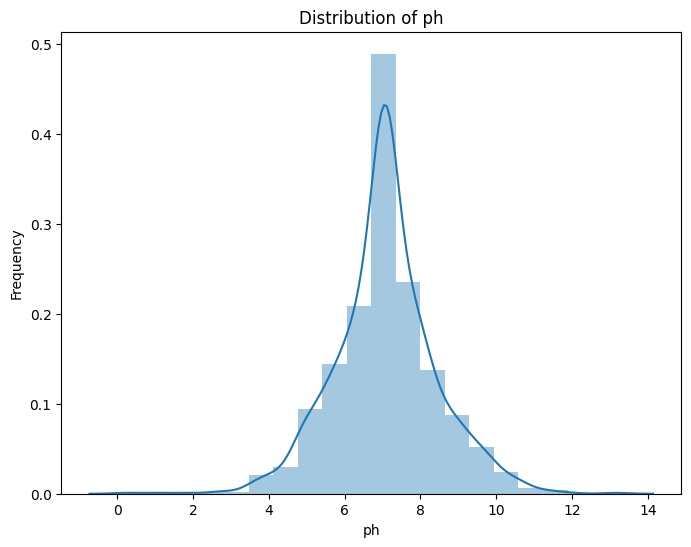

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\2382876865.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_potable[column], bins=20)


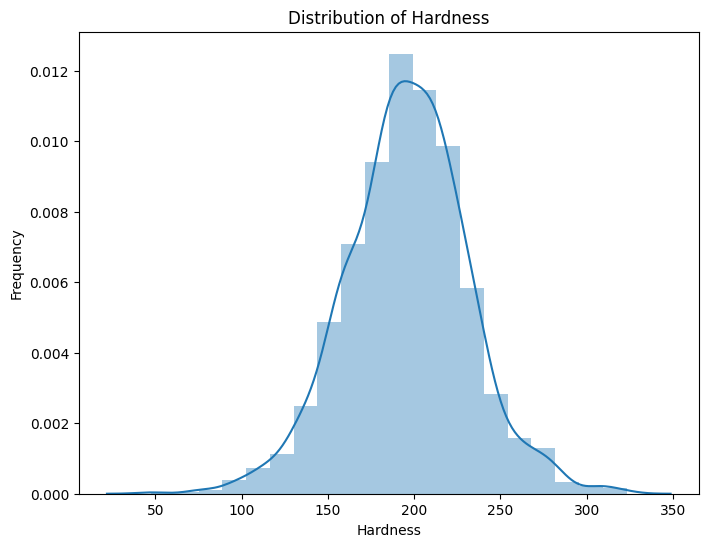

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\2382876865.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_potable[column], bins=20)


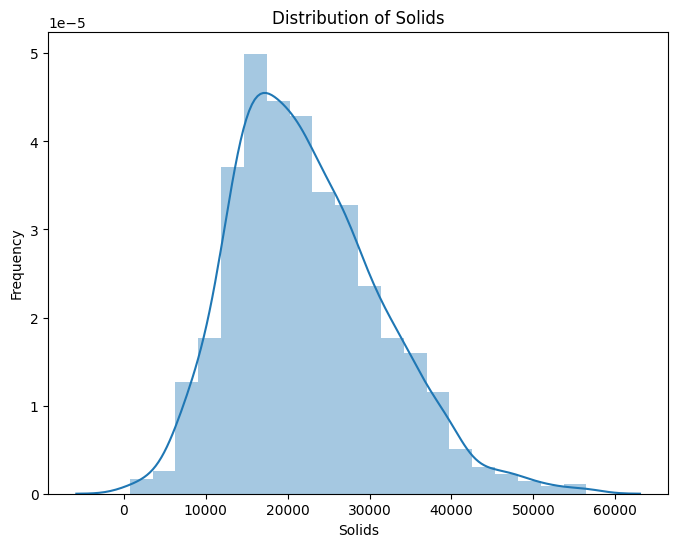

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\2382876865.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_potable[column], bins=20)


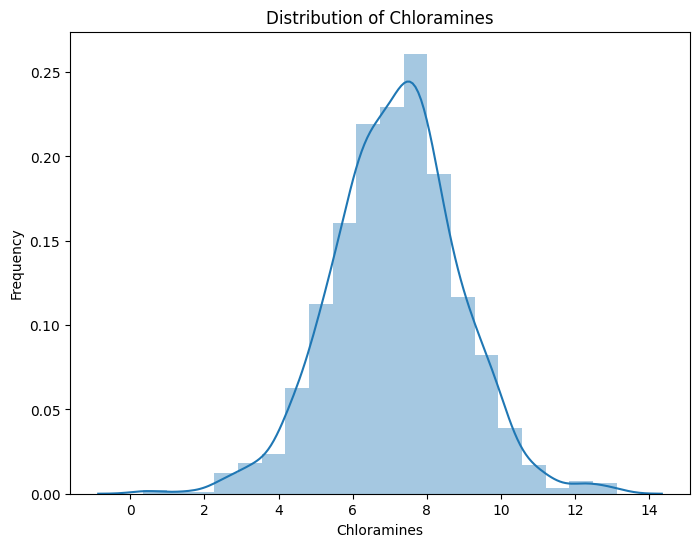

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\2382876865.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_potable[column], bins=20)


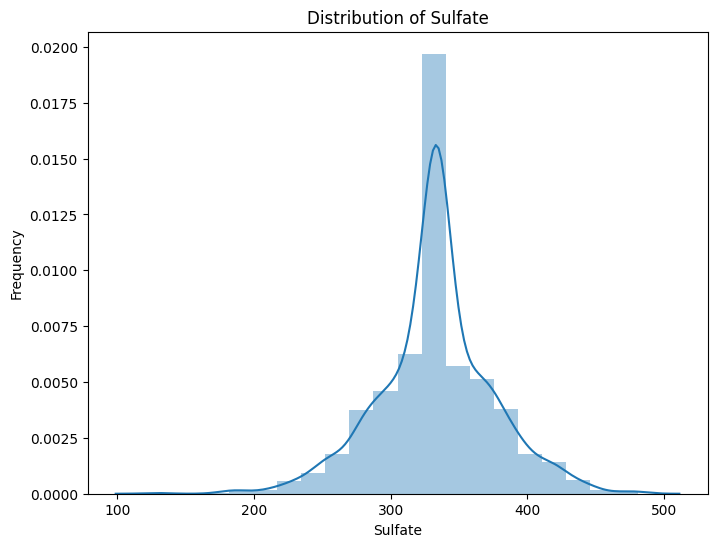

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\2382876865.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_potable[column], bins=20)


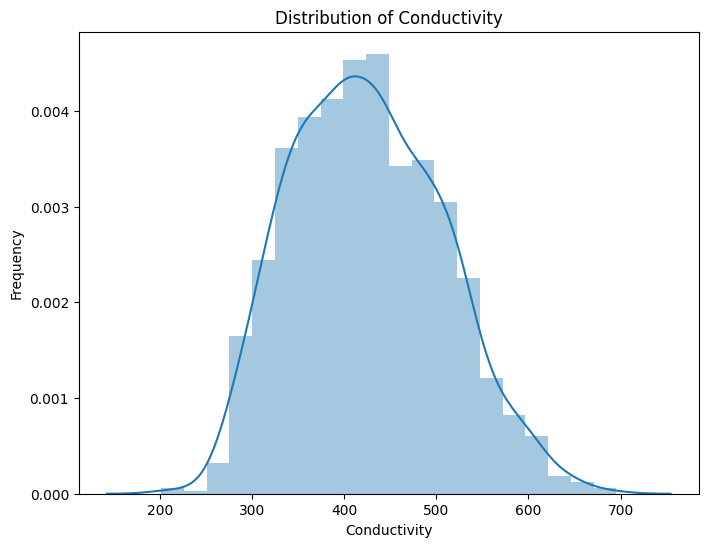

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\2382876865.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_potable[column], bins=20)


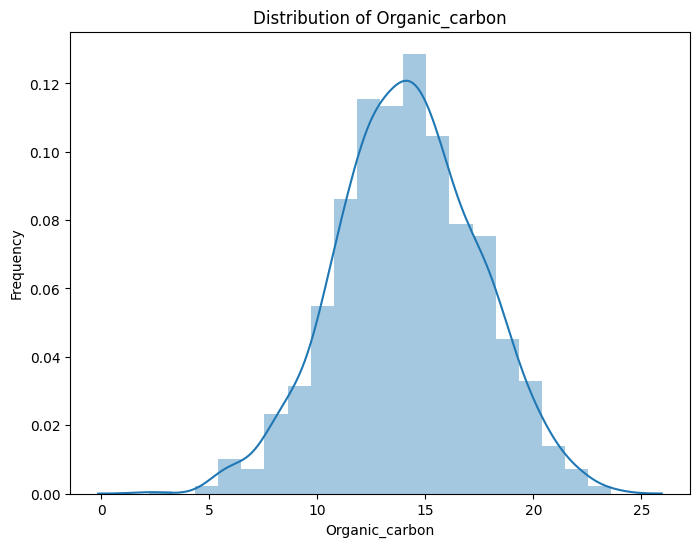

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\2382876865.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_potable[column], bins=20)


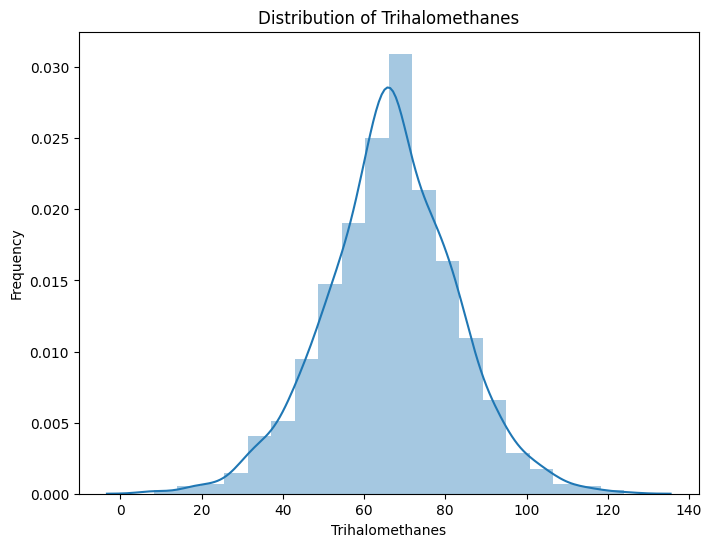

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\2382876865.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_potable[column], bins=20)


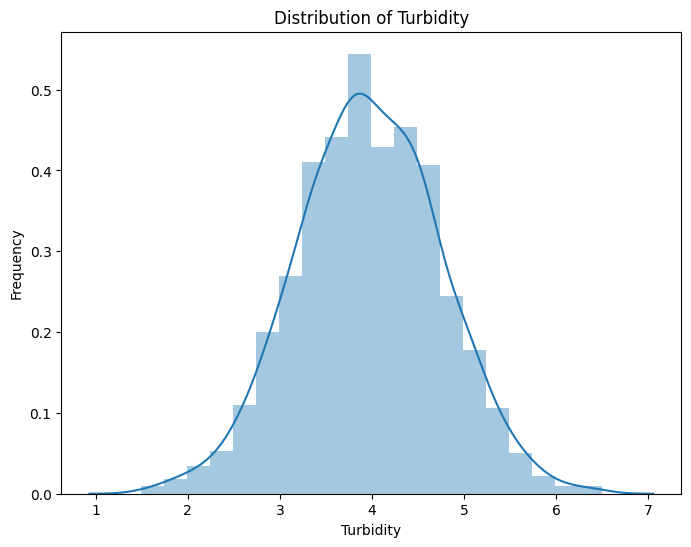

In [8]:
#plotting the data distribution of potable water

for column in df_potable.columns:
    if column=='Potability':
        df.drop([column],axis=1)
    else:    
        plt.figure(figsize=(8, 6))
        sns.distplot(df_potable[column], bins=20)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\1649054172.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_not_potable[column], bins=20)


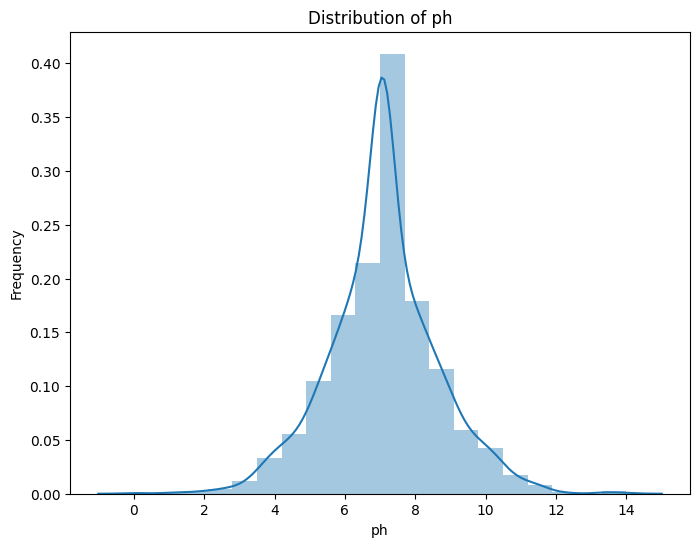

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\1649054172.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_not_potable[column], bins=20)


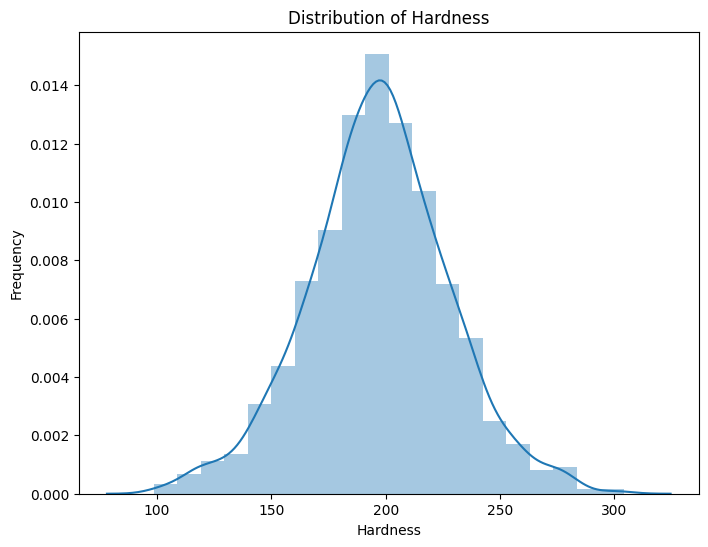

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\1649054172.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_not_potable[column], bins=20)


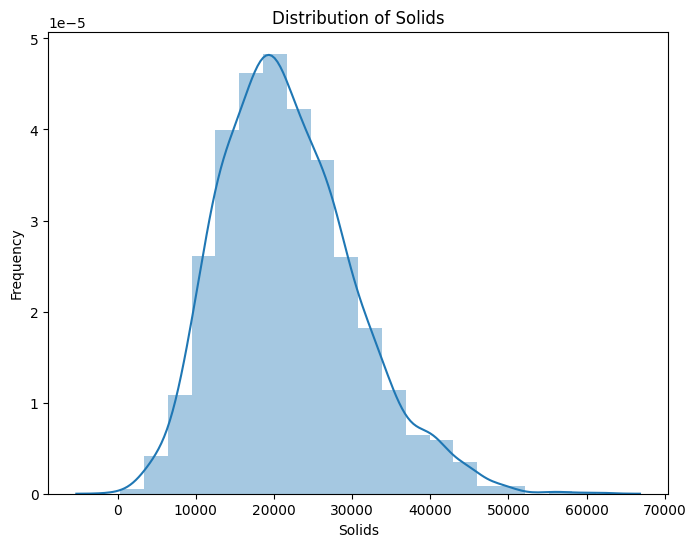

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\1649054172.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_not_potable[column], bins=20)


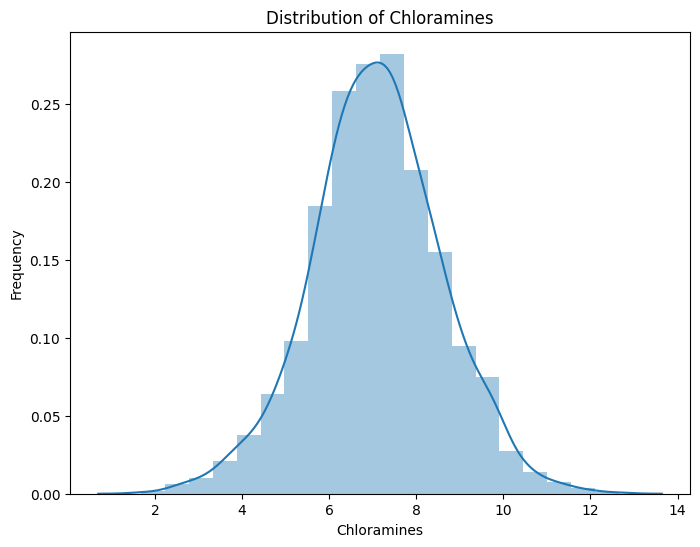

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\1649054172.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_not_potable[column], bins=20)


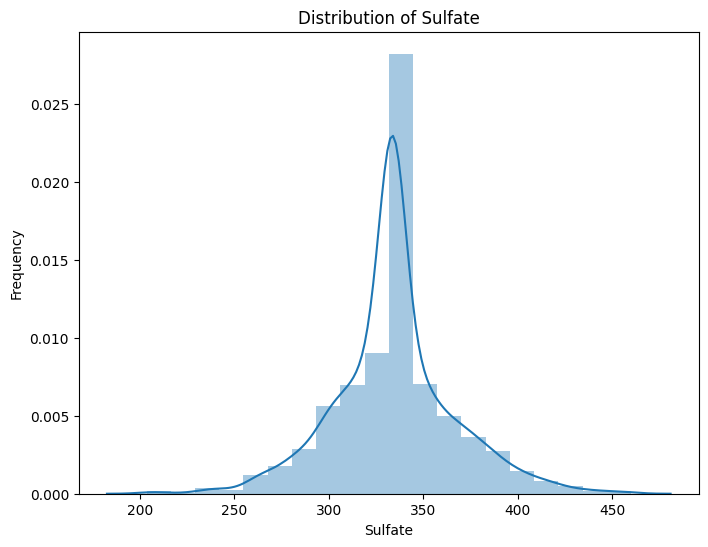

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\1649054172.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_not_potable[column], bins=20)


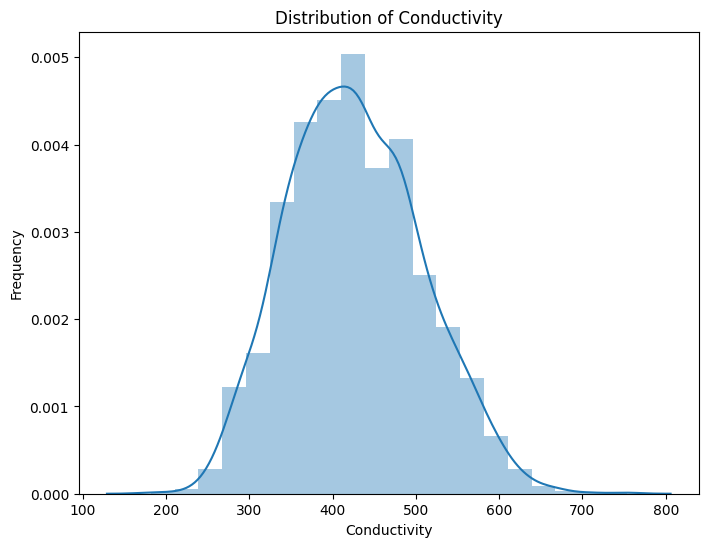

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\1649054172.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_not_potable[column], bins=20)


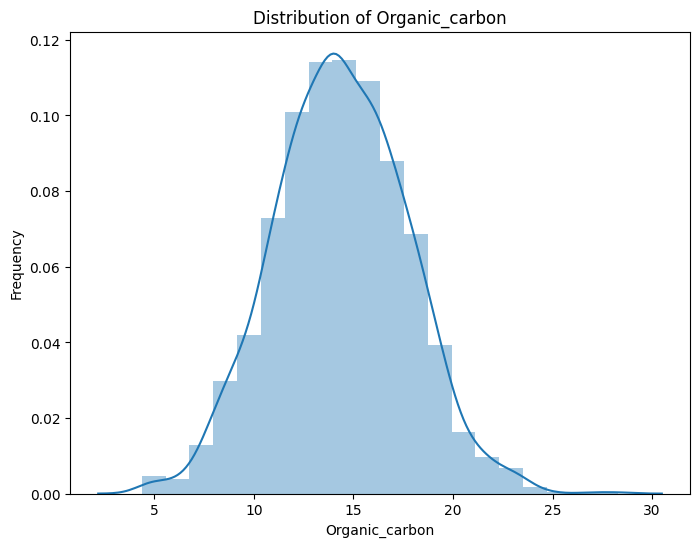

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\1649054172.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_not_potable[column], bins=20)


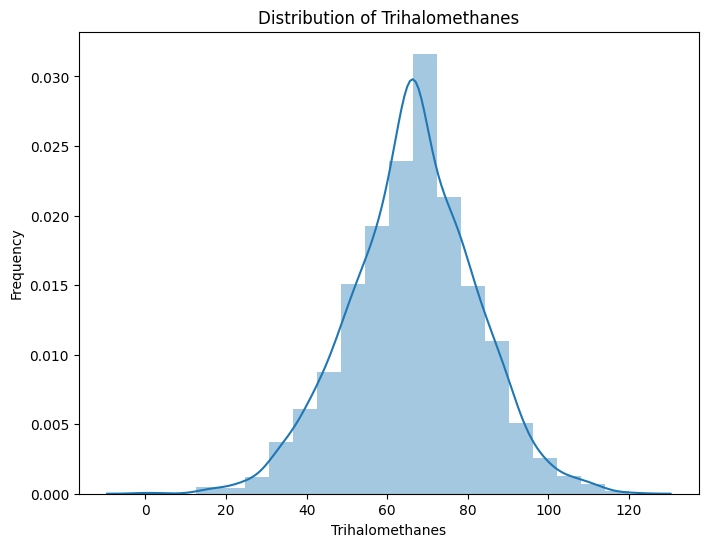

C:\Users\HARIHARAN\AppData\Local\Temp\ipykernel_34076\1649054172.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_not_potable[column], bins=20)


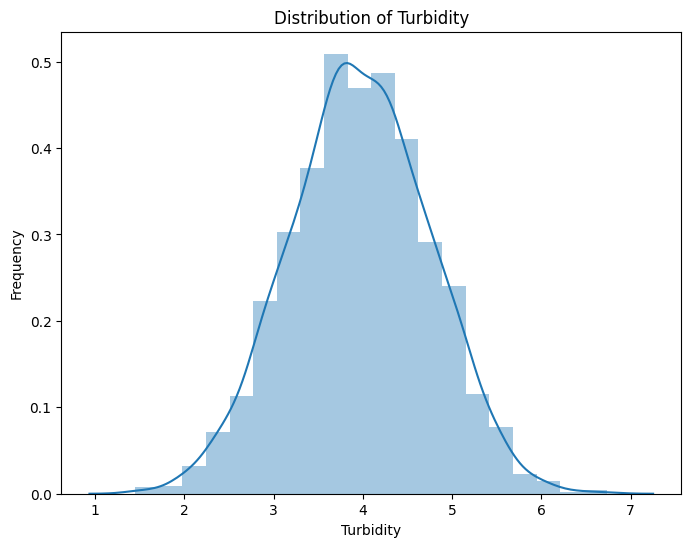

In [9]:
#plotting the data distribution of non potable water

for column in df_not_potable.columns:
    if column=='Potability':
        df.drop([column],axis=1)
    else:    
        plt.figure(figsize=(8, 6))
        sns.distplot(df_not_potable[column], bins=20)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

__The data is showing noramal distribution for both potable and non potable datasets__

In [42]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#df_1 = sc.fit_transform(df.iloc[:, :-1])
#df_scaled = pd.DataFrame(df_1, columns = df.columns[:-1])
#df_scaled['Potability'] = df['Potability']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


__Scaling the dataset__

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_1 = sc.fit_transform(df.iloc[:, :-1])
df_scaled = pd.DataFrame(df_1, columns = df.columns[:-1])
df_scaled['Potability'] = df['Potability']

__Splitting the dataset into independent and target variables__

In [95]:
X = df_scaled.drop(['Potability'],axis=1) 
y = df_scaled['Potability']

In [96]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786


In [97]:
y.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

__Resampling the data__

In [98]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X1,Y1=smote.fit_resample(X,y)
X1.shape,Y1.shape,Y1.value_counts()


((3996, 9),
 (3996,),
 Potability
 0    1998
 1    1998
 Name: count, dtype: int64)

__Splitting the data into training and testing samples__

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2)

In [100]:
X_train.shape

(3196, 9)

In [101]:
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1430,0.215528,0.656045,0.283791,-0.760137,3.145987e-15,-0.002501,-0.611254,-1.071432,-1.931975
3374,-0.391540,-0.626360,-0.701267,0.079731,5.295097e-01,0.201772,0.647250,0.031097,-0.044899
3921,-0.489981,0.043991,-0.334819,-0.322322,2.987627e-02,2.502939,0.268154,-0.209814,0.541016
809,-0.852709,-0.163182,0.439050,-1.452099,-4.911923e-01,-0.691086,1.232561,-1.124986,-1.009476
108,-0.668583,-0.193877,0.657312,-0.429088,3.916923e-01,-2.231675,0.106393,0.445749,0.013555


In [102]:
y_train.value_counts()

Potability
1    1608
0    1588
Name: count, dtype: int64

In [103]:
y_test.value_counts()

Potability
0    410
1    390
Name: count, dtype: int64

__Implementing hyper parameter tuning in Logistic Regression,Random Forest Classifier and Decision Tree Classifier and selecting the best model that has the highest accuracy score__

In [109]:
models = {
   
    'Logistic Regression':LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
   
}



In [110]:
params = {
    
    'Logistic Regression' : {'C':[1,5,10,50]},
    'Random Forest Classifier': {'n_estimators': [0, 10, 50, 100, 200]},
    'Decision Tree Classifier': {'max_depth': [None, 10, 20, 30, 50]},
    
}

In [111]:
results = []

In [112]:

for model_name, model in models.items():
    grid_search = GridSearchCV(model, params[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the results
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    test_accuracy = accuracy_score(y_test, grid_search.predict(X_test))
    
    # Append results to list
    results.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Best Cross-Validation Score': best_score,
        'Test Accuracy': test_accuracy
    })

C:\Users\HARIHARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HARIHARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HARIHARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\HARIHARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\s

In [113]:
results_df = pd.DataFrame(results)
results_df

,Model,Best Parameters,Best Cross-Validation Score,Test Accuracy
0,Logistic Regression,{'C': 5},0.528797,0.46625
1,Random Forest Classifier,{'n_estimators': 200},0.719335,0.74250
2,Decision Tree Classifier,{'max_depth': 20},0.620459,0.63250


__Random Forest classifier with n estimator value of 200 is selected as the model as it gives the best score__

In [114]:
rlf=RandomForestClassifier(n_estimators=200)
rlf.fit(X_train,y_train)
y_pred=rlf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy




0.74125

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       410
           1       0.73      0.74      0.74       390

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800

